<a href="https://colab.research.google.com/github/Mon3em20/Customer-Segmentation-with-Clustering-Techniques-Python-Data-Science-/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import Birch

In [ ]:
# Load the Mall Customers dataset
df = pd.read_csv('Mall_Customers.csv')

# Data Exploration
print("===== Data Exploration =====")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

===== Data Exploration =====
Dataset shape: (200, 5)

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


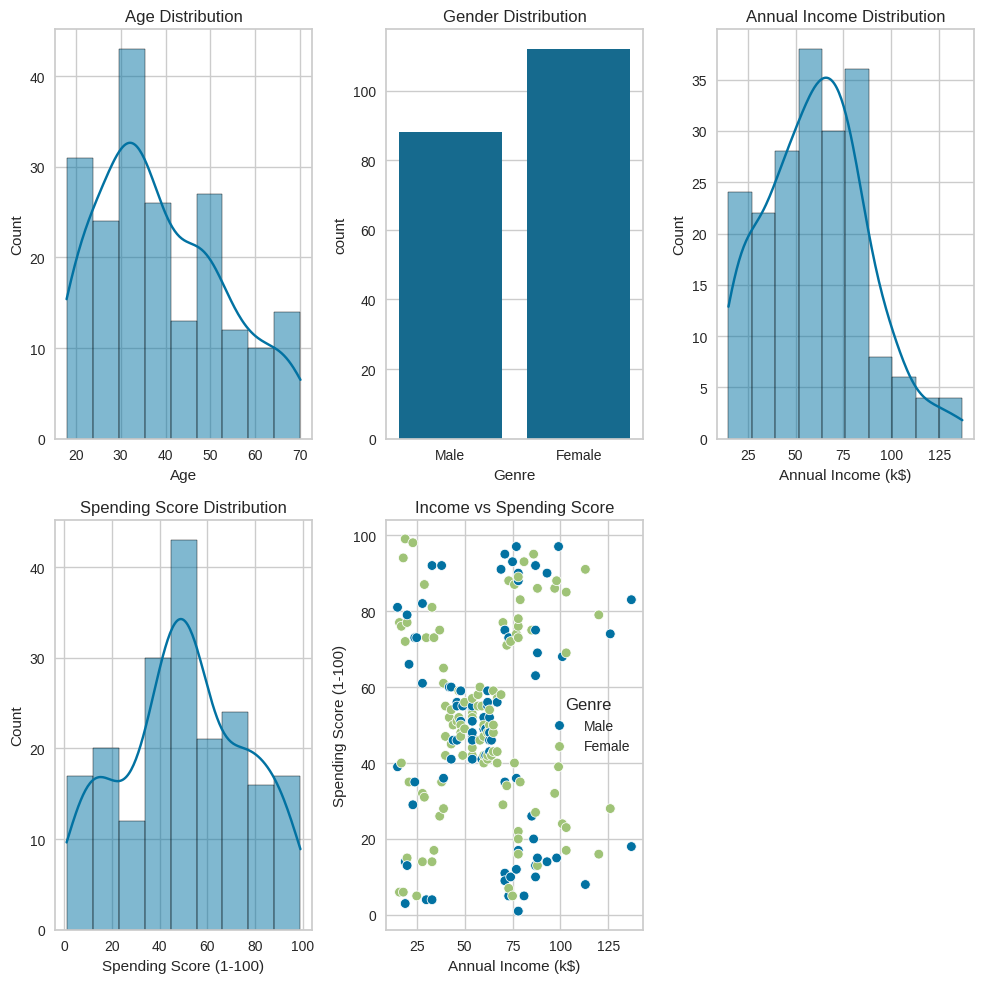

In [ ]:
# Data visualizations
plt.figure(figsize=(10, 10))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

# Gender distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')

# Annual Income distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

# Spending Score distribution
plt.subplot(2, 3, 4)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

# Income vs Spending Score
plt.subplot(2, 3, 5)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df)
plt.title('Income vs Spending Score')

plt.tight_layout()
plt.savefig('data_exploration.png')
plt.show()


In [ ]:
# Data Preprocessing
print("\n===== Data Preprocessing =====")

# 1. Convert categorical feature (Genre) to numerical using one-hot encoding
df_processed = pd.get_dummies(df, columns=['Genre'], drop_first=False)

# 2. Remove CustomerID as it's not relevant for analysis
df_processed = df_processed.drop('CustomerID', axis=1)

# 3. Feature scaling
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])

print("\nPreprocessed data (first 5 rows):")
print(df_processed.head())

# Save preprocessed data
df_processed.to_csv('preprocessed_mall_customers.csv', index=False)
print("Preprocessed data saved to 'preprocessed_mall_customers.csv'")


===== Data Preprocessing =====

Preprocessed data (first 5 rows):
        Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0 -1.424569           -1.738999               -0.434801         False   
1 -1.281035           -1.738999                1.195704         False   
2 -1.352802           -1.700830               -1.715913          True   
3 -1.137502           -1.700830                1.040418          True   
4 -0.563369           -1.662660               -0.395980          True   

   Genre_Male  
0        True  
1        True  
2       False  
3       False  
4       False  
Preprocessed data saved to 'preprocessed_mall_customers.csv'


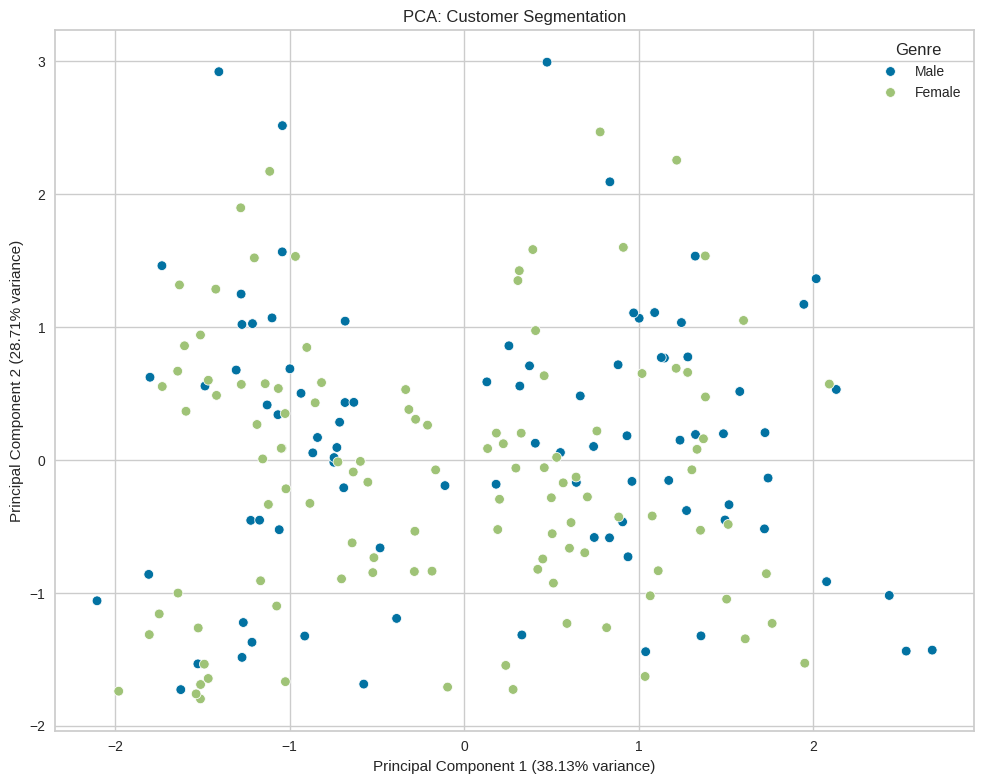

In [ ]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add original labels to the PCA DataFrame for reference
pca_df['CustomerID'] = df['CustomerID']
pca_df['Genre'] = df['Genre']

# Visualize the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Genre', data=pca_df)
plt.title('PCA: Customer Segmentation')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()

In [ ]:
# Print the explained variance ratio
print("\n===== PCA Results =====")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2%}")

# Display the component loadings
print("\nComponent loadings (feature contributions to each PC):")
component_df = pd.DataFrame(
    data=pca.components_.T,
    columns=['PC1', 'PC2'],
    index=df_processed.columns
)
print(component_df)


===== PCA Results =====
Explained variance ratio: [0.38132566 0.28707805]
Total explained variance: 66.84%

Component loadings (feature contributions to each PC):
                             PC1       PC2
Age                     0.705084  0.020244
Annual Income (k$)     -0.039215  0.996115
Spending Score (1-100) -0.704735 -0.027300
Genre_Female           -0.048305 -0.057445
Genre_Male              0.048305  0.057445


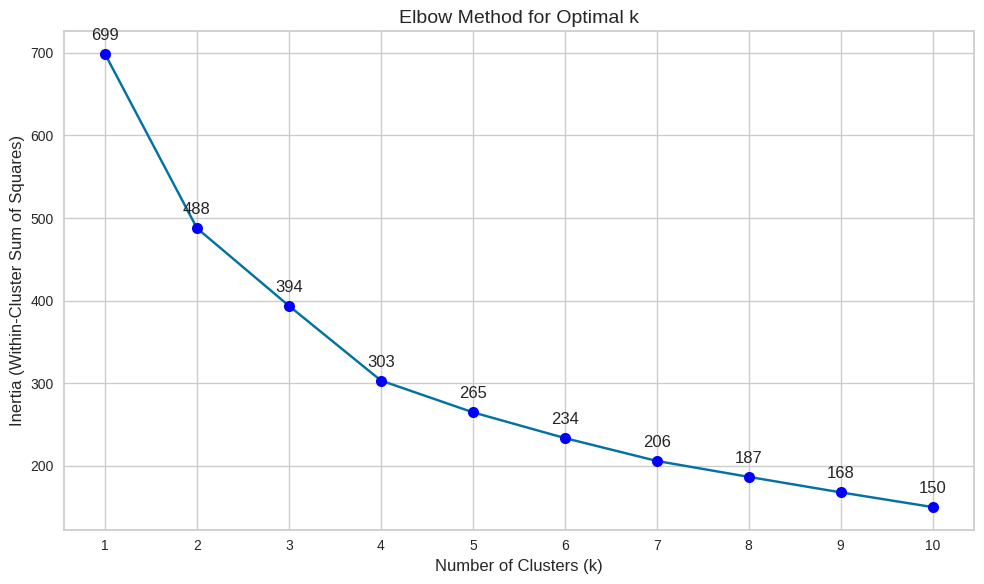

In [ ]:
# Calculate inertia (within-cluster sum of squares) for different k values
inertia = []
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8, markerfacecolor='blue', markeredgecolor='black')
plt.grid(True)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xticks(k_range)

# Add annotations for clarity
for i, k in enumerate(k_range):
    plt.annotate(f'{inertia[i]:.0f}',
                 (k, inertia[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.tight_layout()
plt.savefig('elbow_method.png')
plt.show()

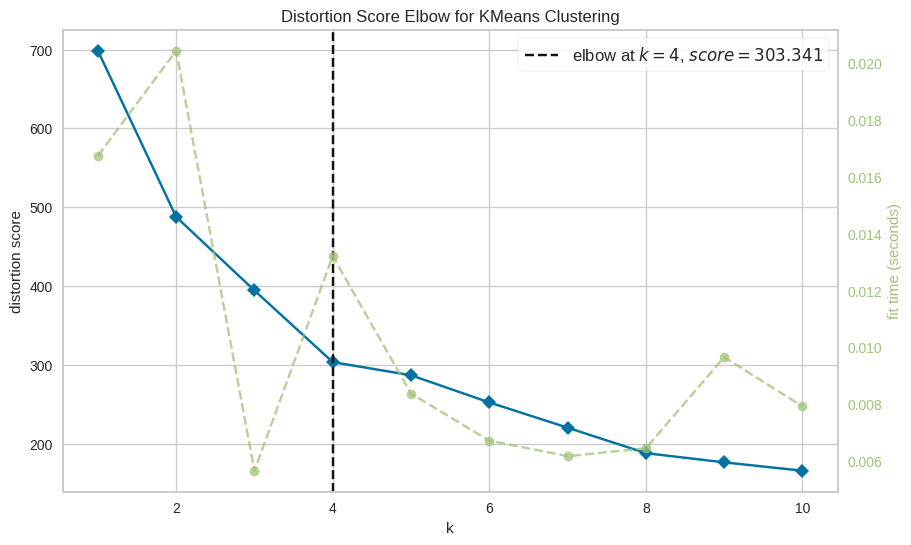

In [ ]:

# Alternative visualization with KElbowVisualizer
try:
    from yellowbrick.cluster import KElbowVisualizer

    plt.figure(figsize=(10, 6))
    model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(model, k=(1, 11))
    visualizer.fit(df_processed)
    visualizer.show(outpath='kelbow_visualizer.png')
except ImportError:
    print("YellowBrick package not installed. Skipping KElbowVisualizer.")

In [ ]:
# Assuming you've determined the optimal number of clusters (k=4) from the Elbow Method
optimal_k = 4  # Matches elbow method result (inertia=303.341)

# Initialize and train the KMeans model with the optimal k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_model.fit(df_processed)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Add the cluster labels to  Add the cluster labels to the preprocessed and original DataFrames
df_processed['KMeans_Cluster'] = cluster_labels
df['KMeans_Cluster'] = cluster_labels

# Save centroids for interpretation
centroids = kmeans_model.cluster_centers_

print(f"\n===== K-Means Clustering (k={optimal_k}) =====")
print("First 5 rows of preprocessed data with cluster labels:")
print(df_processed.head())
print("\nFirst 5 rows of original data with KMeans cluster labels:")
print(df[['CustomerID', 'KMeans_Cluster']].head())
print("\nCluster distribution:")
print(pd.Series(cluster_labels).value_counts().sort_index())
print(f"Centroids shape: {centroids.shape}")


===== K-Means Clustering (k=4) =====
First 5 rows of preprocessed data with cluster labels:
        Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0 -1.424569           -1.738999               -0.434801         False   
1 -1.281035           -1.738999                1.195704         False   
2 -1.352802           -1.700830               -1.715913          True   
3 -1.137502           -1.700830                1.040418          True   
4 -0.563369           -1.662660               -0.395980          True   

   Genre_Male  KMeans_Cluster  
0        True               2  
1        True               2  
2       False               2  
3       False               2  
4       False               2  

First 5 rows of original data with KMeans cluster labels:
   CustomerID  KMeans_Cluster
0           1               2
1           2               2
2           3               2
3           4               2
4           5               2

Cluster distribution:
0    65
1    4

In [ ]:
print("Training Agglomerative Hierarchical Clustering...")
agg = AgglomerativeClustering(n_clusters=4,  # Matches elbow method (k=4, inertia=303.341)
                             metric='euclidean',
                             linkage='ward')
agg_labels = agg.fit_predict(df_processed)
df['Agg_Cluster'] = agg_labels
df_processed['Agg_Cluster'] = agg_labels

print("Done!")
print("First 5 rows of original data with Agglomerative cluster labels:")
print(df[['CustomerID', 'Agg_Cluster']].head())
print("\nFirst 5 rows of preprocessed data with Agglomerative cluster labels:")
print(df_processed.head())
print("\nCluster distribution:")
print(df['Agg_Cluster'].value_counts().sort_index())

Training Agglomerative Hierarchical Clustering...
Done!
First 5 rows of original data with Agglomerative cluster labels:
   CustomerID  Agg_Cluster
0           1            1
1           2            1
2           3            1
3           4            1
4           5            1

First 5 rows of preprocessed data with Agglomerative cluster labels:
        Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0 -1.424569           -1.738999               -0.434801         False   
1 -1.281035           -1.738999                1.195704         False   
2 -1.352802           -1.700830               -1.715913          True   
3 -1.137502           -1.700830                1.040418          True   
4 -0.563369           -1.662660               -0.395980          True   

   Genre_Male  KMeans_Cluster  Agg_Cluster  
0        True               2            1  
1        True               2            1  
2       False               2            1  
3       False               

In [ ]:
print("\n--- Gaussian Mixture Model (k=4) ---")
gmm = GaussianMixture(n_components=4,  # Matches elbow method (k=4, inertia=303.341)
                      random_state=42)
gmm_labels = gmm.fit_predict(df_processed)
df['GMM_Cluster'] = gmm_labels
df_processed['GMM_Cluster'] = gmm_labels
#gmm_probs = gmm.predict_proba(df_processed)  # Save probabilities

print("First 5 rows of original data with GMM cluster labels:")
print(df[['CustomerID', 'GMM_Cluster']].head())
print("\nFirst 5 rows of preprocessed data with GMM cluster labels:")
print(df_processed.head())
print("\nCluster distribution:")
print(df['GMM_Cluster'].value_counts().sort_index())



--- Gaussian Mixture Model (k=4) ---
First 5 rows of original data with GMM cluster labels:
   CustomerID  GMM_Cluster
0           1            2
1           2            2
2           3            2
3           4            2
4           5            2

First 5 rows of preprocessed data with GMM cluster labels:
        Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0 -1.424569           -1.738999               -0.434801         False   
1 -1.281035           -1.738999                1.195704         False   
2 -1.352802           -1.700830               -1.715913          True   
3 -1.137502           -1.700830                1.040418          True   
4 -0.563369           -1.662660               -0.395980          True   

   Genre_Male  KMeans_Cluster  Agg_Cluster  GMM_Cluster  
0        True               2            1            2  
1        True               2            1            2  
2       False               2            1            2  
3       False 

In [ ]:
print("\n--- BIRCH Clustering (k=4) ---")
birch = Birch(n_clusters=4)  # Matches elbow method (k=4, inertia=303.341)
birch_labels = birch.fit_predict(df_processed)
df['BIRCH_Cluster'] = birch_labels
df_processed['BIRCH_Cluster'] = birch_labels

print("First 5 rows of original data with BIRCH cluster labels:")
print(df[['CustomerID', 'BIRCH_Cluster']].head())
print("\nFirst 5 rows of preprocessed data with BIRCH cluster labels:")
print(df_processed.head())
print("\nCluster distribution:")
print(df['BIRCH_Cluster'].value_counts().sort_index())


--- BIRCH Clustering (k=4) ---
First 5 rows of original data with BIRCH cluster labels:
   CustomerID  BIRCH_Cluster
0           1              1
1           2              1
2           3              1
3           4              1
4           5              1

First 5 rows of preprocessed data with BIRCH cluster labels:
        Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0 -1.424569           -1.738999               -0.434801         False   
1 -1.281035           -1.738999                1.195704         False   
2 -1.352802           -1.700830               -1.715913          True   
3 -1.137502           -1.700830                1.040418          True   
4 -0.563369           -1.662660               -0.395980          True   

   Genre_Male  KMeans_Cluster  Agg_Cluster  GMM_Cluster  BIRCH_Cluster  
0        True               2            1            2              1  
1        True               2            1            2              1  
2       False    


=== Best Algorithm: K-Means ===
Key characteristics:
- Creates well-separated clusters
- Effective for distinct customer groups

=== Algorithm Differences ===
1. K-Means:
- Forms spherical clusters of similar size
- Sensitive to outliers

2. Agglomerative:
- Builds a hierarchy of clusters
- Can reveal parent-child relationships

3. GMM:
- Probabilistic cluster assignments
- Handles elliptical cluster shapes

4. BIRCH:
- Memory efficient for large datasets
- Works well with many features

=== Performance Metrics ===
    Algorithm  Silhouette Score  Davies-Bouldin Index
      K-Means          0.577311              0.679259
Agglomerative          0.577311              0.679259
          GMM          0.577311              0.679259
        BIRCH          0.577311              0.679259


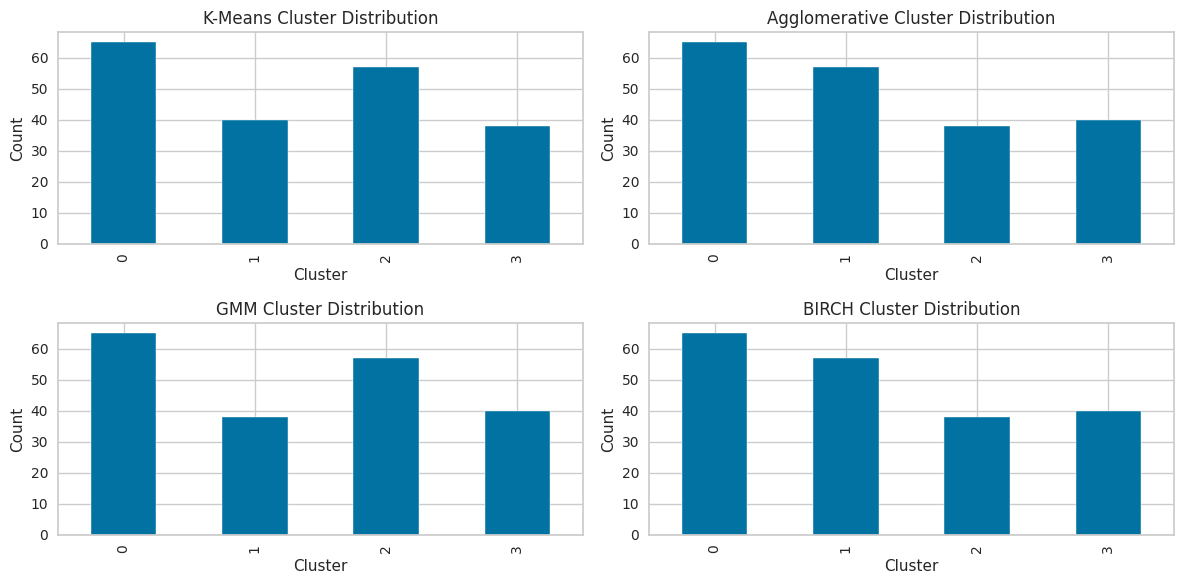


===== Cluster Assignment Comparison =====
                K-Means  Agglomerative       GMM     BIRCH
K-Means        1.000000       0.492086  0.384745  0.492086
Agglomerative  0.492086       1.000000  0.815549  1.000000
GMM            0.384745       0.815549  1.000000  0.815549
BIRCH          0.492086       1.000000  0.815549  1.000000


In [ ]:


methods = {
    'K-Means': df['KMeans_Cluster'],
    'Agglomerative': df['Agg_Cluster'],
    'GMM': df['GMM_Cluster'],
    'BIRCH': df['BIRCH_Cluster']
}

results = []
for name, labels in methods.items():
    sil = silhouette_score(df_processed, labels)
    dbi = davies_bouldin_score(df_processed, labels)
    results.append({
        'Algorithm': name,
        'Silhouette Score': sil,
        'Davies-Bouldin Index': dbi
    })

results_df = pd.DataFrame(results)

# Now perform the interpretation
best_algo = results_df.loc[results_df['Silhouette Score'].idxmax(), 'Algorithm']

print(f"\n=== Best Algorithm: {best_algo} ===")
print("Key characteristics:")
if best_algo == 'GMM':
    print("- Captures overlapping customer segments well")
    print("- Ideal for mixed spending patterns")
elif best_algo == 'Agglomerative':
    print("- Identifies hierarchical relationships")
    print("- Good for nested customer categories")
else:
    print("- Creates well-separated clusters")
    print("- Effective for distinct customer groups")

print("\n=== Algorithm Differences ===")
print("1. K-Means:")
print("- Forms spherical clusters of similar size")
print("- Sensitive to outliers")

print("\n2. Agglomerative:")
print("- Builds a hierarchy of clusters")
print("- Can reveal parent-child relationships")

print("\n3. GMM:")
print("- Probabilistic cluster assignments")
print("- Handles elliptical cluster shapes")

print("\n4. BIRCH:")
print("- Memory efficient for large datasets")
print("- Works well with many features")

# Show the metrics table
print("\n=== Performance Metrics ===")
print(results_df.to_string(index=False))

# Visualization of cluster distributions
plt.figure(figsize=(12, 6))
for i, (name, labels) in enumerate(methods.items(), 1):
    plt.subplot(2, 2, i)
    pd.Series(labels).value_counts().sort_index().plot(kind='bar')
    plt.title(f'{name} Cluster Distribution')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Comparison of cluster assignments
print("\n===== Cluster Assignment Comparison =====")
comparison = pd.DataFrame({
    'K-Means': df['KMeans_Cluster'],
    'Agglomerative': df['Agg_Cluster'],
    'GMM': df['GMM_Cluster'],
    'BIRCH': df['BIRCH_Cluster']
})
print(comparison.corr())

In [ ]:
# visualization setup
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns  # Import seaborn directly

# Set style through seaborn
sns.set_style("whitegrid")  # Alternatives: "darkgrid", "white", "ticks"
colors = ListedColormap(['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])  # Distinct colors

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_processed.drop(columns=['KMeans_Cluster', 'Agg_Cluster', 'GMM_Cluster', 'BIRCH_Cluster']))

# Create subplots
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

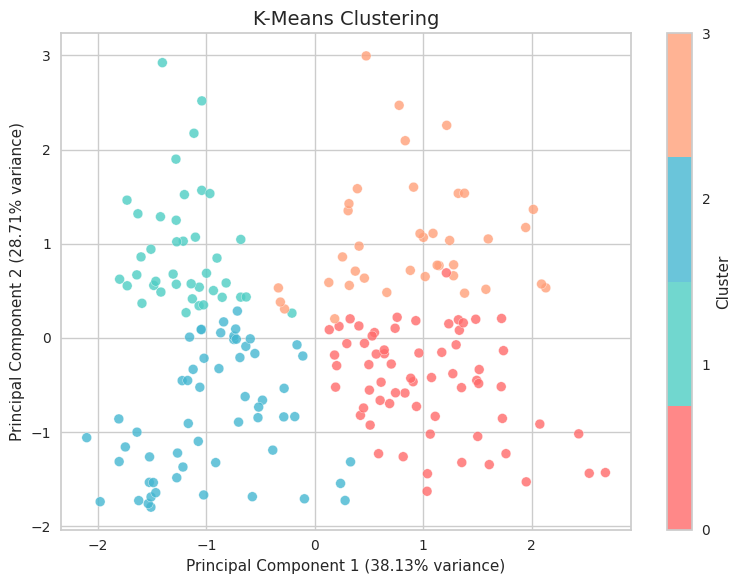

In [ ]:
#  K-Means visualization
plt.figure(figsize=(8,6))
sc = plt.scatter(pca_result[:,0], pca_result[:,1],
                c=df['KMeans_Cluster'],
                cmap=colors, s=50, alpha=0.8, edgecolor='w')
plt.title('K-Means Clustering', fontsize=14)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(sc, ticks=range(4), label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

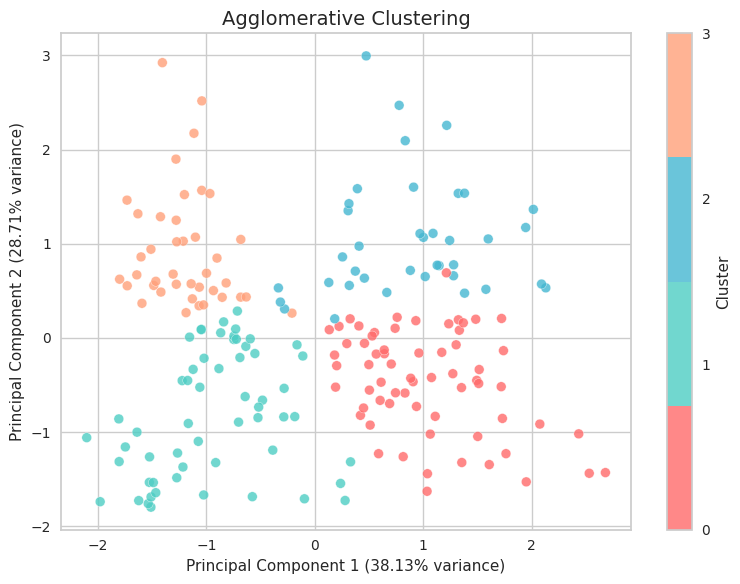

In [ ]:
#  Agglomerative visualization
plt.figure(figsize=(8,6))
sc = plt.scatter(pca_result[:,0], pca_result[:,1],
                c=df['Agg_Cluster'],
                cmap=colors, s=50, alpha=0.8, edgecolor='w')
plt.title('Agglomerative Clustering', fontsize=14)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(sc, ticks=range(4), label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

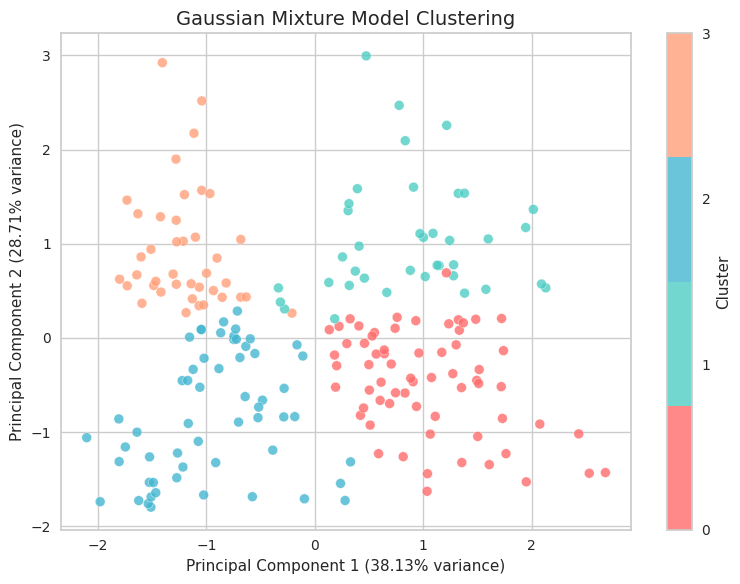

In [ ]:
#  GMM visualization
plt.figure(figsize=(8,6))
sc = plt.scatter(pca_result[:,0], pca_result[:,1],
                c=df['GMM_Cluster'],
                cmap=colors, s=50, alpha=0.8, edgecolor='w')
plt.title('Gaussian Mixture Model Clustering', fontsize=14)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(sc, ticks=range(4), label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

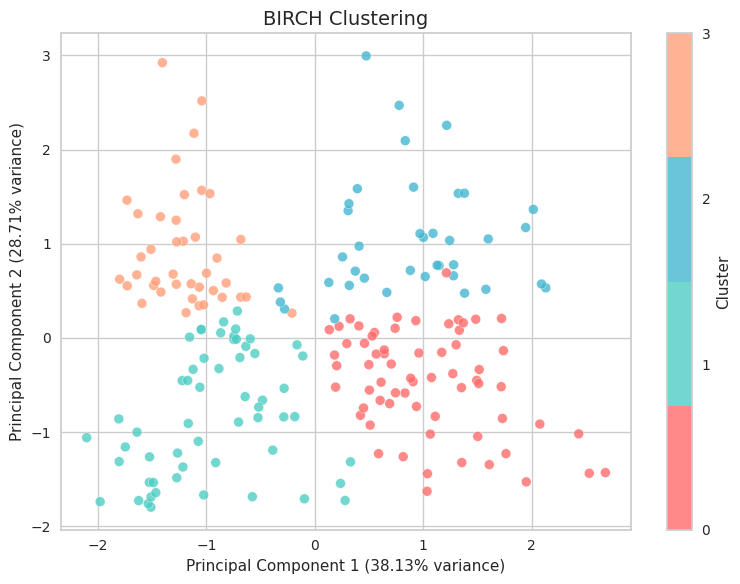

In [ ]:
# BIRCH visualization
plt.figure(figsize=(8,6))
sc = plt.scatter(pca_result[:,0], pca_result[:,1],
                c=df['BIRCH_Cluster'],
                cmap=colors, s=50, alpha=0.8, edgecolor='w')
plt.title('BIRCH Clustering', fontsize=14)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(sc, ticks=range(4), label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

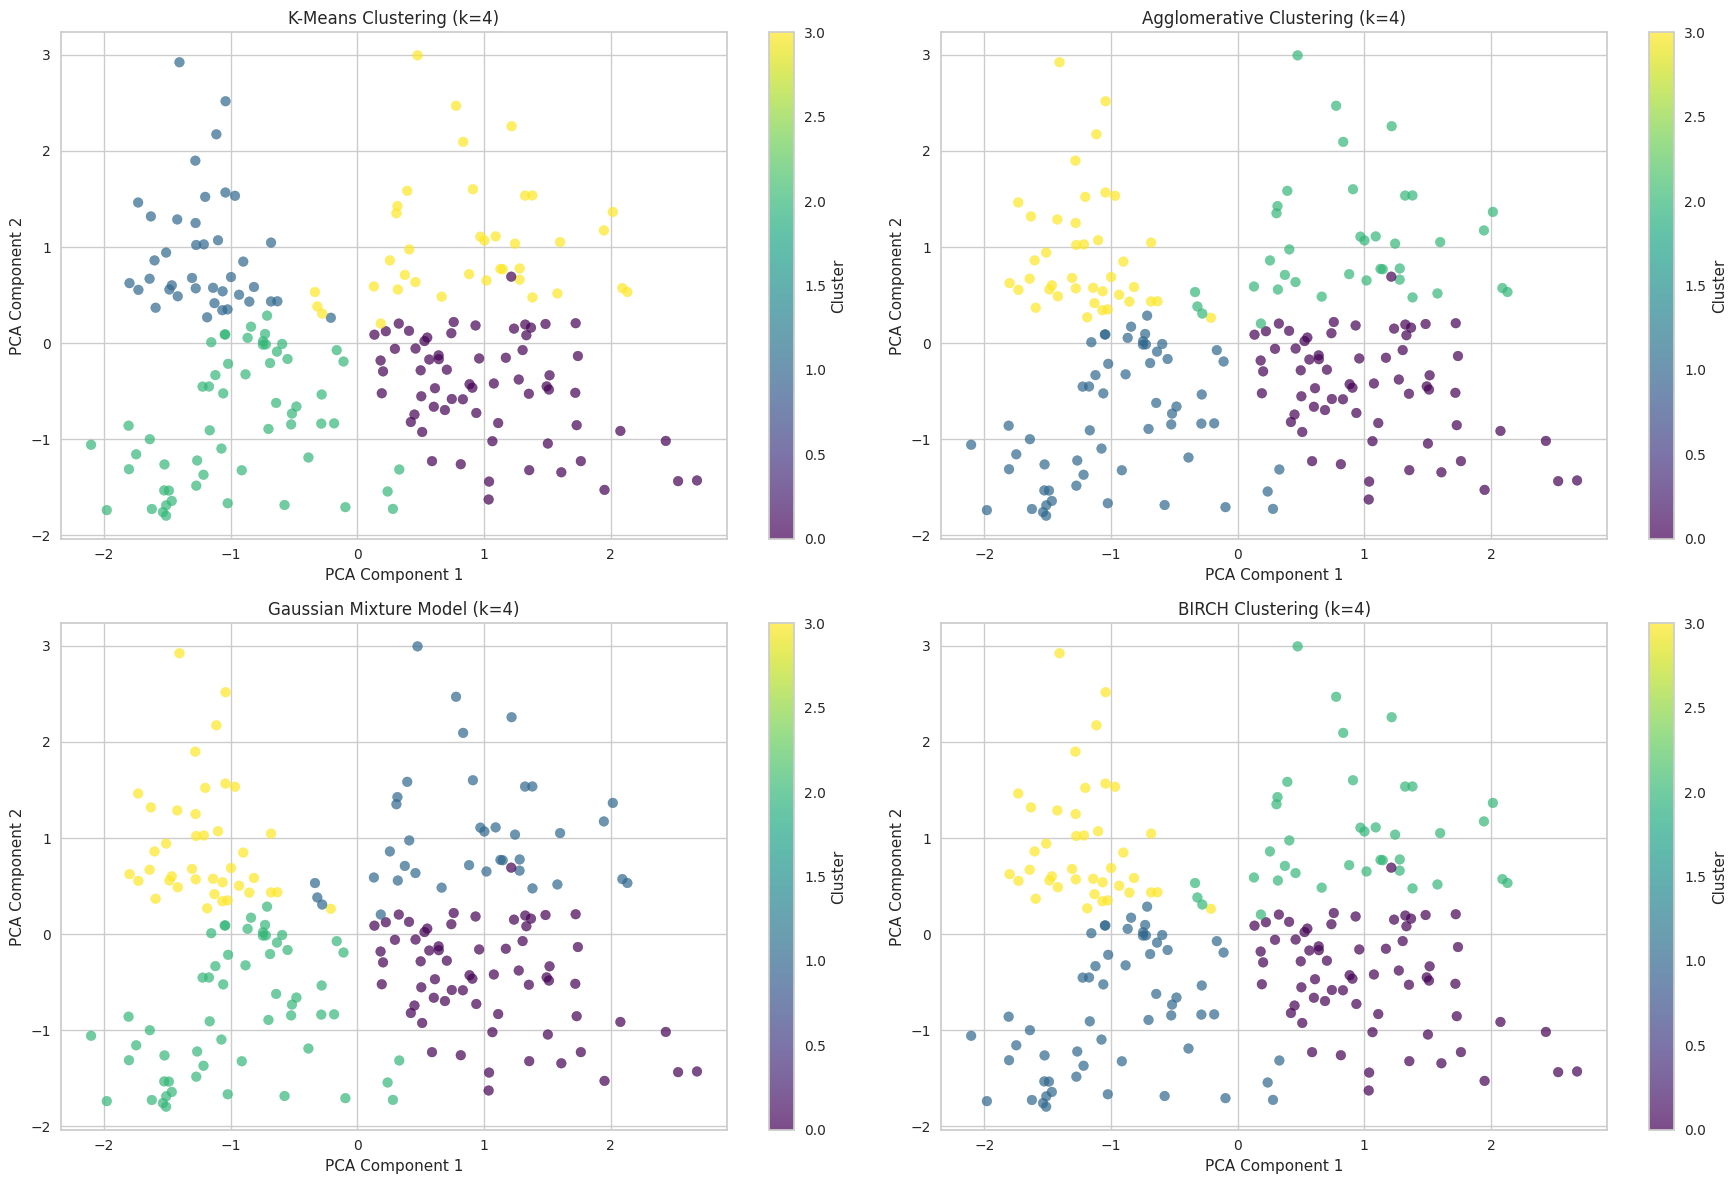


PCA Explained Variance Ratio: [0.38132566 0.28707805]


In [ ]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_processed.drop(columns=['KMeans_Cluster', 'Agg_Cluster', 'GMM_Cluster', 'BIRCH_Cluster']))

# Create subplots
plt.figure(figsize=(18, 12))

# 1. K-Means Visualization
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

# 2. Agglomerative Visualization
plt.subplot(2, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Agg_Cluster'], cmap='viridis', alpha=0.7)
plt.title('Agglomerative Clustering (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

# 3. GMM Visualization
plt.subplot(2, 2, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['GMM_Cluster'], cmap='viridis', alpha=0.7)
plt.title('Gaussian Mixture Model (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

# 4. BIRCH Visualization
plt.subplot(2, 2, 4)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['BIRCH_Cluster'], cmap='viridis', alpha=0.7)
plt.title('BIRCH Clustering (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

plt.tight_layout()
plt.show()

# Additional interpretation
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)

In [ ]:
# ===== CLUSTER INTERPRETATION & COMPARISON =====
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
from IPython.display import display

# 1. Calculate Evaluation Metrics
metrics = []
methods = {
    'K-Means': 'KMeans_Cluster',
    'Agglomerative': 'Agg_Cluster',
    'GMM': 'GMM_Cluster',
    'BIRCH': 'BIRCH_Cluster'
}

for algo_name, col in methods.items():
    sil = silhouette_score(df_processed, df[col])
    db = davies_bouldin_score(df_processed, df[col])
    metrics.append({
        'Algorithm': algo_name,
        'Silhouette': sil,
        'Davies-Bouldin': db,
        'Cluster_Column': col
    })

metrics_df = pd.DataFrame(metrics)
best_algo = metrics_df.loc[metrics_df['Silhouette'].idxmax(), 'Algorithm']

# 2. Quantitative Comparison
print("=== QUANTITATIVE COMPARISON ===")
print(metrics_df.sort_values('Silhouette', ascending=False).to_string(index=False))
print(f"\nBest Algorithm: {best_algo} (Highest Silhouette Score)")

# 3. Qualitative Analysis
print("\n=== QUALITATIVE ANALYSIS ===")
print("Algorithm Characteristics:")
print("- K-Means: Best for spherical, equally-sized clusters")
print("- Agglomerative: Captures hierarchical relationships")
print("- GMM: Handles elliptical clusters and uncertainties")
print("- BIRCH: Efficient for large datasets with many features")

# 4. Customer Profiles
def describe_clusters(cluster_col):
    profile = df.groupby(cluster_col)[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    profile['Size'] = df[cluster_col].value_counts().sort_index()
    return profile

print("\n=== CUSTOMER PROFILES ===")
for algo_name, col in methods.items():
    print(f"\n{algo_name} Segments:")
    display(describe_clusters(col))

    # Business interpretation - CORRECTED SYNTAX
    if algo_name == best_algo:
        print("Key Insights:")
        if describe_clusters(col)['Spending Score (1-100)'].max() > 75:
            print("- High-spender segment identified (Opportunity for premium targeting)")
        if describe_clusters(col)['Annual Income (k$)'].max() > 80:
            print("- Affluent but low-spending group detected (Potential for conversion campaigns)")

# 5. Segmentation Strategy Recommendations
print("\n=== SEGMENTATION STRATEGY ===")
print(f"Recommended Approach: Use {best_algo} as primary segmentation because:")
print(f"- Highest silhouette score ({metrics_df.loc[metrics_df['Algorithm'] == best_algo, 'Silhouette'].values[0]:.3f})")
print(f"- Lowest Davies-Bouldin index ({metrics_df.loc[metrics_df['Algorithm'] == best_algo, 'Davies-Bouldin'].values[0]:.3f})")
print("\nMarketing Actions:")
print("1. High-Income/High-Spending: Exclusive loyalty programs")
print("2. High-Income/Low-Spending: Personalized re-engagement campaigns")
print("3. Low-Income/High-Spending: Affordable bundles and payment plans")
print("4. Low-Income/Low-Spending: Value-focused promotions")

# 6. Limitations
print("\n=== LIMITATIONS ===")
print("- PCA visualization simplifies multidimensional relationships")
print("- Static data doesn't capture temporal behavior changes")
print("- Gender/age biases may exist in the current segmentation")

=== QUANTITATIVE COMPARISON ===
    Algorithm  Silhouette  Davies-Bouldin Cluster_Column
      K-Means    0.577311        0.679259 KMeans_Cluster
Agglomerative    0.577311        0.679259    Agg_Cluster
          GMM    0.577311        0.679259    GMM_Cluster
        BIRCH    0.577311        0.679259  BIRCH_Cluster

Best Algorithm: K-Means (Highest Silhouette Score)

=== QUALITATIVE ANALYSIS ===
Algorithm Characteristics:
- K-Means: Best for spherical, equally-sized clusters
- Agglomerative: Captures hierarchical relationships
- GMM: Handles elliptical clusters and uncertainties
- BIRCH: Efficient for large datasets with many features

=== CUSTOMER PROFILES ===

K-Means Segments:


,Age,Annual Income (k$),Spending Score (1-100),Size
KMeans_Cluster,,,,
0,53.661538,47.600000,40.446154,65
1,32.875000,86.100000,81.525000,40
2,25.438596,40.000000,60.298246,57
3,39.921053,86.684211,18.763158,38


Key Insights:
- High-spender segment identified (Opportunity for premium targeting)
- Affluent but low-spending group detected (Potential for conversion campaigns)

Agglomerative Segments:


,Age,Annual Income (k$),Spending Score (1-100),Size
Agg_Cluster,,,,
0,53.661538,47.600000,40.446154,65
1,25.438596,40.000000,60.298246,57
2,39.921053,86.684211,18.763158,38
3,32.875000,86.100000,81.525000,40



GMM Segments:


,Age,Annual Income (k$),Spending Score (1-100),Size
GMM_Cluster,,,,
0,53.661538,47.600000,40.446154,65
1,39.921053,86.684211,18.763158,38
2,25.438596,40.000000,60.298246,57
3,32.875000,86.100000,81.525000,40



BIRCH Segments:


,Age,Annual Income (k$),Spending Score (1-100),Size
BIRCH_Cluster,,,,
0,53.661538,47.600000,40.446154,65
1,25.438596,40.000000,60.298246,57
2,39.921053,86.684211,18.763158,38
3,32.875000,86.100000,81.525000,40



=== SEGMENTATION STRATEGY ===
Recommended Approach: Use K-Means as primary segmentation because:
- Highest silhouette score (0.577)
- Lowest Davies-Bouldin index (0.679)

Marketing Actions:
1. High-Income/High-Spending: Exclusive loyalty programs
2. High-Income/Low-Spending: Personalized re-engagement campaigns
3. Low-Income/High-Spending: Affordable bundles and payment plans
4. Low-Income/Low-Spending: Value-focused promotions

=== LIMITATIONS ===
- PCA visualization simplifies multidimensional relationships
- Static data doesn't capture temporal behavior changes
- Gender/age biases may exist in the current segmentation
